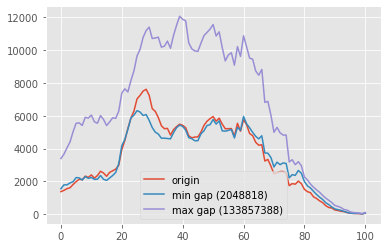

In [54]:
import matplotlib.pyplot as plt
import numpy as np1
import numpy as np2
import numpy as np3
import numpy as np4
import csv

plt.style.use('ggplot')

#광진구 numpy array 만들기

f = open('excel.csv')
data = csv.reader(f)
next(data)

standard = "서울특별시 광진구 (1121500000)"
standardList = []
for row in data:
    if row[0] == standard:
        for i in range(3,104):
            temp = row[i].replace(',','')
            standardList.append(int(temp))

standardNumpyArray = np1.array(standardList)
plt.plot(standardNumpyArray, label='origin')



#파일 읽으면서 비교 -> 광진구와 차이가 많이나는 지역과 적게나는 지역을 찾는다.

f1 = open('excel.csv')
data1 = csv.reader(f1)
next(data1)

gapMax = 0
gapMaxName = ''
gaMaxValue = 0

gapMin = 9999999999
gapMinName = ''
gaMinValue = 0

for row in data1:
    tempList = []
    for j in range(3,104):
        temp = row[j].replace(',','')
        tempList.append(int(temp))
    tempNumpyArray = np2.array(tempList)
    x = (standardNumpyArray - tempNumpyArray) * (standardNumpyArray - tempNumpyArray)
    xSum = x.sum()
    ##표준편차 구하기
    #xX = (tempNumpyArray - xSum/101) * (tempNumpyArray - xSum/101)
    xX = np.square(tempNumpyArray - xSum/101)
    yY = np.sqrt(xX.sum())
    yY = round(yY)
    
    
    if xSum > gapMax:
        gapMax = xSum
        gapMaxName = row[0]
        gapMaxValue = yY
        
    if xSum < gapMin and row[0]!="서울특별시 광진구 (1121500000)":
        gapMin = xSum
        gapMinName = row[0]
        gapMinValue = yY

        
#그래프 그리기

f2 = open('excel.csv')
data2 = csv.reader(f2)
next(data2)

tempList1 = []
tempList2 = []
for row in data2:
    if row[0] == gapMaxName:
        for j in range(3,104):
            temp1 = row[j].replace(',','')
            tempList1.append(int(temp1))
        tempNumpyArray1 = np3.array(tempList1)
        plt.plot(tempNumpyArray1, label='max gap ({0})'.format(gapMaxValue))
        
    elif row[0] == gapMinName:
        for j in range(3,104):
            temp2 = row[j].replace(',','')
            tempList2.append(int(temp2))
        tempNumpyArray2 = np4.array(tempList2)
        plt.plot(tempNumpyArray2, label='min gap ({0})'.format(gapMinValue))
        
        
    
plt.legend()
plt.show()